In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


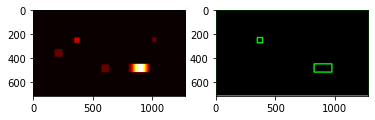

In [9]:
class HeatMap:
    def __init__(self, thresh_val, width=1280, height=720):
        self.width = width
        self.height = height
        self.map = np.zeros((self.height, self.width))
        self.thresh_map = np.zeros((self.height, self.width), dtype=np.bool)
        self.thresh_val = thresh_val

    def add(self, pos_x, pos_y, win_size):
        self.map[pos_y : (pos_y + win_size), pos_x : pos_x + win_size] += 1

    def update(self, boxes):
        for b in boxes:
            x, y, size = b
            self.add(x, y, size)

    def threshold (self):
        self.thresh_map[self.map > self.thresh_val] = 1

    def draw(self, frame, color=(0,255,0), thickness=10):
        labeled, num_labels = label(self.thresh_map)

        for i in range(0, num_labels + 1):
            xs, ys = (labeled == i).nonzero()
            p1 = (np.min(ys), np.min(xs))
            p2 = (np.max(ys), np.max(xs))
            cv2.rectangle(frame, p1, p2, color, thickness)
        
        return frame

hm = HeatMap(thresh_val=1)
# hm.add(800, 450, 70)
# hm.add(820, 450, 70)
# hm.add(830, 450, 70)
# hm.add(840, 450, 70)
# hm.add(850, 450, 70)
# hm.add(860, 450, 70)
# hm.add(870, 450, 70)
# hm.add(880, 450, 70)
# hm.add(890, 450, 70)
# hm.add(900, 450, 70)
# hm.add(910, 450, 70)
# # Noise
# hm.add(345, 230, 45)
# hm.add(345, 230, 45)
# hm.add(998, 230, 35)
# hm.add(573, 456, 65)
# hm.add(182, 328, 65)
boxes = [
        (800, 450, 70),
        (820, 450, 70),
        (830, 450, 70),
        (840, 450, 70),
        (850, 450, 70),
        (860, 450, 70),
        (870, 450, 70),
        (880, 450, 70),
        (890, 450, 70),
        (900, 450, 70),
        (910, 450, 70),
        (345, 230, 45),
        (345, 230, 45),
        (998, 230, 35),
        (573, 456, 65),
        (182, 328, 65)
        ]
hm.update(boxes)
hm.threshold() 

plt.subplot(1,2,1)
plt.imshow(hm.map, cmap='hot')

plt.subplot(1,2,2)
# plt.imshow(hm.thresh_map,  cmap='gray')

test_frame = np.zeros((720, 1280, 3))
test_frame = hm.draw(test_frame)
plt.imshow(test_frame)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


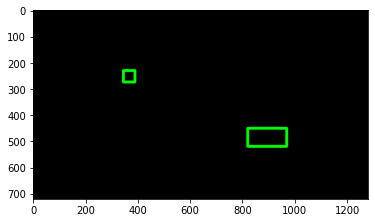

In [13]:
def HeatmapThresh(heatmap, threshold=1):
    res = np.zeros(heatmap.shape)
    res[heatmap > threshold] = 1
    return res

def HeatmapDraw(thresh_map, frame, color=(0,255,0), thickness=10):
    labeled, num_labels = label(thresh_map)
    for i in range(1, num_labels + 1):
        xs, ys = (labeled == i).nonzero()
        p1 = (np.min(ys), np.min(xs))
        p2 = (np.max(ys), np.max(xs))
        cv2.rectangle(frame, p1, p2, color, thickness)
    return frame

def HeatmapAdd(heatmap, pos_x, pos_y, win_size):
        heatmap[pos_y : (pos_y + win_size), pos_x : pos_x + win_size] += 1
        return heatmap

def HeatmapUpdate(heatmap, boxes):
    for b in boxes:
        x, y, size = b
        HeatmapAdd(heatmap, x, y, size)
    return heatmap

boxes =[(800, 450, 70),
        (820, 450, 70),
        (830, 450, 70),
        (840, 450, 70),
        (850, 450, 70),
        (860, 450, 70),
        (870, 450, 70),
        (880, 450, 70),
        (890, 450, 70),
        (900, 450, 70),
        (910, 450, 70),
        (345, 230, 45),
        (345, 230, 45),
        (998, 230, 35),
        (573, 456, 65),
        (182, 328, 65)]

heat = np.zeros((720, 1280))
thresh_map = np.zeros(heat.shape)
test_frame2 = np.zeros((720, 1280, 3))

heat = HeatmapUpdate(heat, boxes)
thresh_map = HeatmapThresh(heat, threshold=1)

test_frame2 = HeatmapDraw(thresh_map, test_frame2)
plt.imshow(test_frame2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


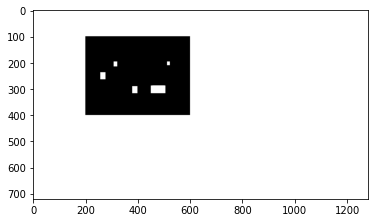

In [11]:
def AddDebugFrame(frame, debug_frame, x, y, size):
    window = cv2.resize(debug_frame, size)
    res = np.copy(frame)
    
    if(len(window.shape) < 3):
        res[x:x+size[1],y:y+size[0],0] = window
        res[x:x+size[1],y:y+size[0],1] = window
        res[x:x+size[1],y:y+size[0],2] = window
    else:
        res[x:x+size[1],y:y+size[0]] = window
    return res

test_image = np.ones((720, 1280,3))
# test_image[:,:] = (0,0,255)

# heat3 = cv2.cvtColor(heat, cv2.COLOR_GRAY2RGB)
test_image = AddDebugFrame(test_image, heat, 100, 200, (400,300))
plt.imshow(test_image, cmap='gray')